<a href="https://colab.research.google.com/github/ethanmarshallanalytics/Object-Detection-YOLOv8/blob/main/MATH_6373_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
from torchvision import transforms, datasets, models
from tqdm import tqdm
import os
from PIL import Image

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



import nibabel as nib
import numpy as np

def load_dataset(folder_path, preprocess):
    data = []
    label = 0

    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        print(subfolder_path)
        if os.path.isdir(subfolder_path):
            for file_name in tqdm(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                if os.path.isfile(file_path):
                    if file_name.endswith('.nii') or file_name.endswith('.nii.gz'):
                        # Handle .nii or .nii.gz files using nibabel
                        image_data = nib.load(file_path).get_fdata()
                        # Here you can preprocess image_data if needed
                        data.append((image_data, label))
                    else:
                        # Handle other image formats using PIL
                        image = preprocess(Image.open(file_path))
                        data.append((image, label))
            label += 1

    return data

folder_path = '/content/drive/MyDrive/data'
dataset = load_dataset(folder_path, preprocess)

/content/drive/MyDrive/data/LICENSE
/content/drive/MyDrive/data/kits.json
/content/drive/MyDrive/data/case_00005


100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


/content/drive/MyDrive/data/case_00006


100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


/content/drive/MyDrive/data/case_00008


100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


/content/drive/MyDrive/data/case_00007


100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


/content/drive/MyDrive/data/case_00009


100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


/content/drive/MyDrive/data/case_00004


100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


/content/drive/MyDrive/data/case_00000


  0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [8]:
# Only loads the first three subfolders
from torchvision import transforms, datasets, models
from tqdm import tqdm
import os
from PIL import Image
import nibabel as nib
import numpy as np

def load_dataset(folder_path, preprocess, num_subfolders=3):  # Add a parameter for the number of subfolders to process
    data = []
    label = 0
    subfolders_processed = 0  # Counter for processed subfolders

    for subfolder in os.listdir(folder_path):
        if subfolders_processed >= num_subfolders:  # Check if we've processed enough subfolders
            break

        subfolder_path = os.path.join(folder_path, subfolder)
        print(subfolder_path)
        if os.path.isdir(subfolder_path):
            for file_name in tqdm(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                if os.path.isfile(file_path):
                    if file_name.endswith('.nii') or file_name.endswith('.nii.gz'):
                        # Handle .nii or .nii.gz files using nibabel
                        image_data = nib.load(file_path).get_fdata()
                        # Here you can preprocess image_data if needed
                        data.append((image_data, label))
                    else:
                        # Handle other image formats using PIL
                        image = preprocess(Image.open(file_path))
                        data.append((image, label))
            label += 1
            subfolders_processed += 1  # Increment the counter for processed subfolders

    return data

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

folder_path = '/content/drive/MyDrive/data'
dataset = load_dataset(folder_path, preprocess, num_subfolders=3)  # Specify the number of subfolders to process


/content/drive/MyDrive/data/LICENSE
/content/drive/MyDrive/data/kits.json
/content/drive/MyDrive/data/case_00005


100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


/content/drive/MyDrive/data/case_00006


100%|██████████| 1/1 [00:00<00:00,  4.49it/s]


/content/drive/MyDrive/data/case_00008


100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


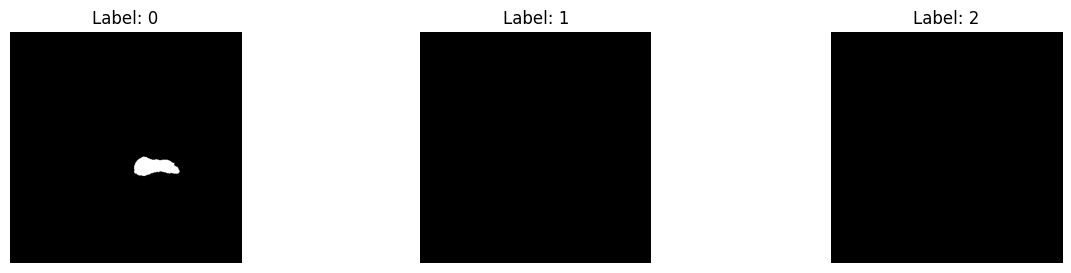

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out only .nii.gz images
nii_images = [sample for sample in dataset if isinstance(sample[0], np.ndarray)]

# Display a middle slice from each .nii.gz image
fig, axes = plt.subplots(1, len(nii_images), figsize=(15, 3))
for i, (image, label) in enumerate(nii_images):
    slice_index = image.shape[0] // 2  # Choose the middle slice along the first axis
    slice_image = image[slice_index, :, :]  # Extract the slice
    axes[i].imshow(slice_image, cmap='gray')  # Assuming grayscale images
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()


In [14]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 950.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [16]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 523, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'track', 'export', 'val', 'train', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'detect', 'segment', 'obb', 'classify'}
                MODE (required) is one of {'predict', 'track', 'export', 'val', 'train', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht